# CIFAR-10 image classiifcation model

## Step 1: Import Libraries 

In [6]:
#Check tensorflow and numpy version
import tensorflow as tf
print(tf.__version__)
import numpy as np
print(np.__version__)

2.11.0
1.26.4


### If your version of Tensorflow is not 2.18, it is recommended to downgrade to 2.11 as the model layers in 2.11 tensorflow version are supported by vitis Ai library for optimization. Tensorflow 2.11 needs a lower numoy version, so it is recommended to lower the numpy version too.

In [7]:
!pip install tensorflow==2.11.0
!pip uninstall -y numpy 
!pip install "numpy<2.0"

Defaulting to user installation because normal site-packages is not writeable
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
You can safely remove it manually.
You can safely remove it manually.
Defaulting to user installation because normal site-packages is not writeable


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Step 2: Import Cifar-10 data  

In [9]:
# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("Original shapes:")
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

#Convert to Grayscale , it is up to you to set your model to take input as RGB images or Grayscale images

x_train_gray = tf.image.rgb_to_grayscale(x_train).numpy()
x_test_gray = tf.image.rgb_to_grayscale(x_test).numpy()

# Normalize pixel values
x_train_gray = x_train_gray.astype('float32') / 255.0
x_test_gray = x_test_gray.astype('float32') / 255.0

#Class Names
class_names = [
    "airplane", "automobile", "bird", "cat", "deer", 
    "dog", "frog", "horse", "ship", "truck"
]

num_classes = 10


Original shapes:
x_train: (50000, 32, 32, 3)
x_test: (10000, 32, 32, 3)


2025-11-02 11:06:06.670259: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11578 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:3b:00.0, compute capability: 7.5
2025-11-02 11:06:06.685395: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 5332 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:d8:00.0, compute capability: 7.5


## Step3: Visulaize your data

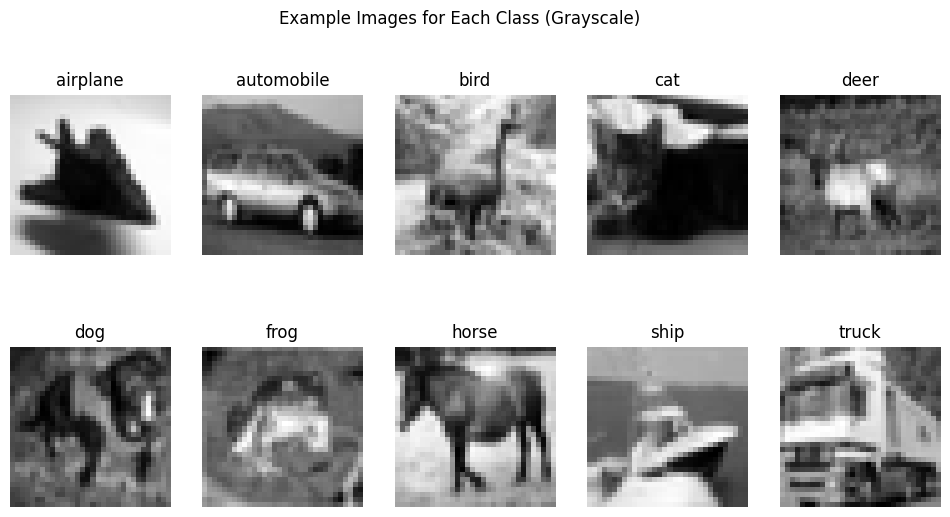

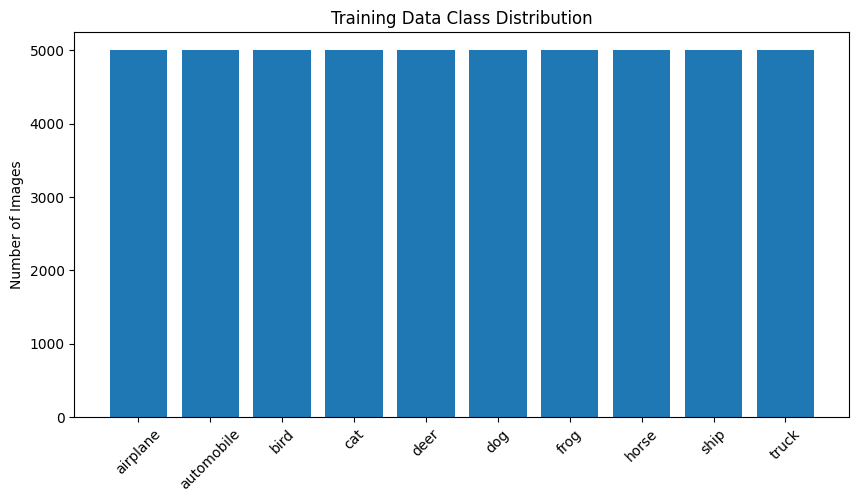

In [10]:
# Visualize one sample per class
plt.figure(figsize=(12, 6))
for i in range(num_classes):
    idx = np.where(y_train.flatten() == i)[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_gray[idx].squeeze(), cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle("Example Images for Each Class (Grayscale)")
plt.show()

# Show class distribution (training set only)
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(class_names, counts)
plt.title("Training Data Class Distribution")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()


## Step4: Build a model for classification, below is an example of CNN model

In [11]:
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'), 
    layers.Flatten(),
    layers.Dense(256, activation='relu'), 
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 flatten (Flatten)           (None, 2048)              0

## Step 5 : Train the model

Epoch 1/11


2025-11-02 11:06:38.153722: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8906


352/352 [==============================] - 14s 12ms/step - loss: 1.7457 - accuracy: 0.3668 - val_loss: 1.4886 - val_accuracy: 0.4730
Epoch 2/11
352/352 [==============================] - 4s 10ms/step - loss: 1.3689 - accuracy: 0.5198 - val_loss: 1.3036 - val_accuracy: 0.5462
Epoch 3/11
352/352 [==============================] - 4s 10ms/step - loss: 1.1977 - accuracy: 0.5846 - val_loss: 1.0904 - val_accuracy: 0.6280
Epoch 4/11
352/352 [==============================] - 4s 10ms/step - loss: 1.0793 - accuracy: 0.6253 - val_loss: 1.0415 - val_accuracy: 0.6360
Epoch 5/11
352/352 [==============================] - 4s 10ms/step - loss: 0.9836 - accuracy: 0.6574 - val_loss: 0.9708 - val_accuracy: 0.6684
Epoch 6/11
352/352 [==============================] - 4s 10ms/step - loss: 0.8971 - accuracy: 0.6914 - val_loss: 0.9107 - val_accuracy: 0.6820
Epoch 7/11
352/352 [==============================] - 4s 10ms/step - loss: 0.8431 - accuracy: 0.7085 - val_loss: 0.8851 - val_accuracy: 0.6904
Epoch 8/1

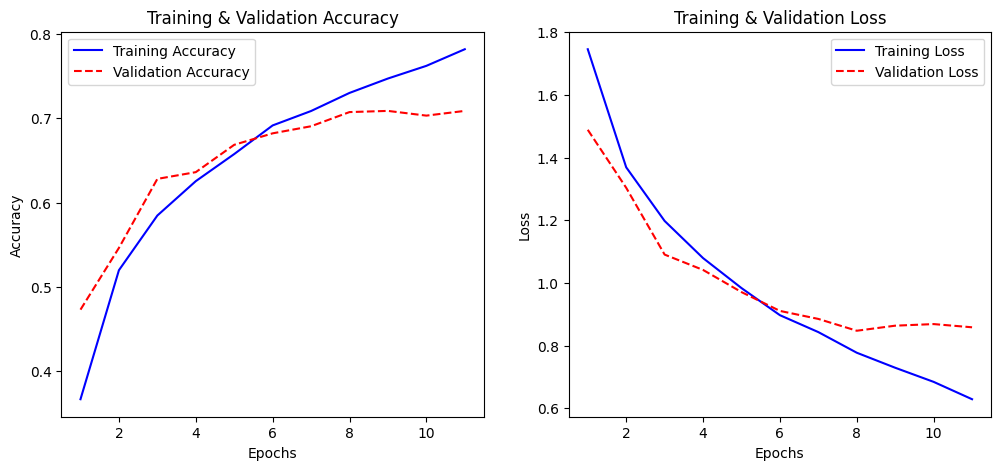

In [12]:
history = model.fit(
    x_train_gray, y_train,
    epochs=11,
    batch_size=128,
    validation_split=0.1, # 5000 images are used for validation
    verbose=1
)


# Plot Training & Validation Accuracy / Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# Plot Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Step 6 : Evaluate Model on test data

313/313 - 1s - loss: 0.9287 - accuracy: 0.6891 - 1s/epoch - 5ms/step

Test Accuracy: 68.91%
313/313 [==============================] - 1s 4ms/step


<Figure size 1000x1000 with 0 Axes>

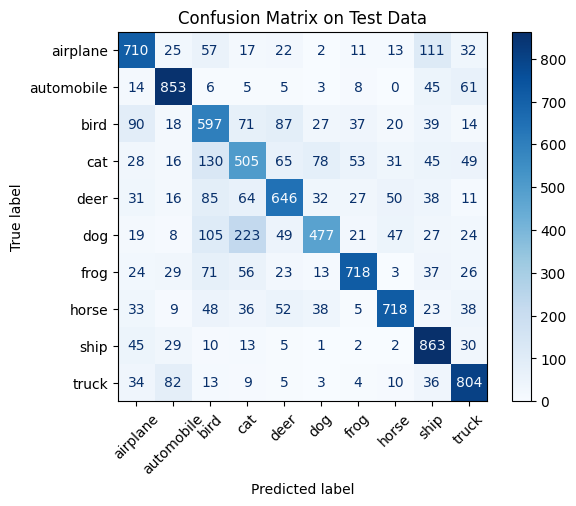

In [13]:
#Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test_gray, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

#Confusion Matrix
y_pred = np.argmax(model.predict(x_test_gray), axis=1)
y_true = y_test.flatten()

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10,10))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix on Test Data")
plt.show()

## Step 7: Save the model


In [14]:
model.save('cifar10_bw_model.h5')